# Защита персональных данных клиентов

## Загрузка данных

Импортируем необходимые библиотеки, модели, функции:

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from warnings import warn
from sklearn.metrics import r2_score

Загружаем и изучаем исходные данные:

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [3]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Поиск и удаление дубликатов

Проверяем наличие полных дубликатов:

In [4]:
data[data.duplicated()==True]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


Нашлось 153 полных дубликата, они составляют 153/5000 = 0.03 часть от общих данных, то есть можем их удалить. Но поскольку нет привязки к ID пользователя мы не можем на 100% считать их дубликатами. Поэтому не будем их удалять.

### Проверка и удаление пропусков

In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Пропусков не обнаружено.

### Провека наличия неинформативных признаков

Все признаки информативны.

### Разделение данных по целевому и нецелевому признакам

In [6]:
features = data.drop('Страховые выплаты', axis=1) # нецелевые признаки
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [7]:
target = data['Страховые выплаты'] #целевой признак
target

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Страховые выплаты, Length: 5000, dtype: int64

### Промежуточные выводы

Проведена загрузка, изучение и предобработка исходных данных:

- исходный датасет состоит из 5000 элементов и 5 признаков; признаки: пол, возраст, зарплата, члены семьи; целевой признак: страховые выплаты;
- обнаружены 153 полных дубликата, они составляли около 3% от общего набора данны, но принято решение их не удалять;
- пропуски не обнаружены;
- неинформативные признаки не обнаружены;
- данные разделены по целевому (4847,1) и нецелевому признакам (4847,4).

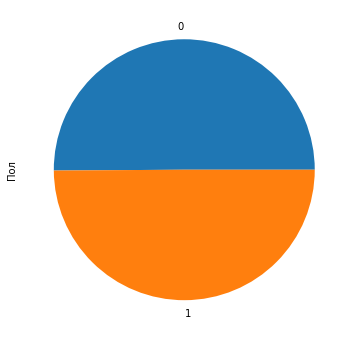

In [8]:
(data['Пол']
            .value_counts()
            .plot.pie(figsize=(6, 6))
);

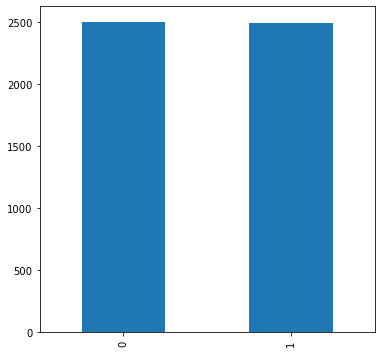

In [9]:
(data['Пол']
            .value_counts()
            .plot.bar(figsize=(6, 6))
);

Можем сделать вывод, что женщины и мужчины представлены практически в равном или в равном соотношении.

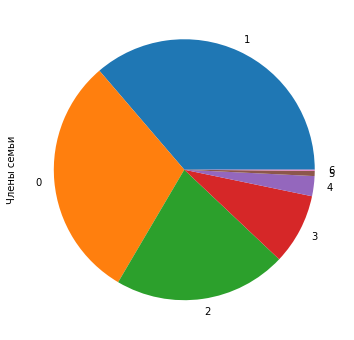

In [10]:
(data['Члены семьи']
            .value_counts()
            .plot.pie(figsize=(6, 6))
);

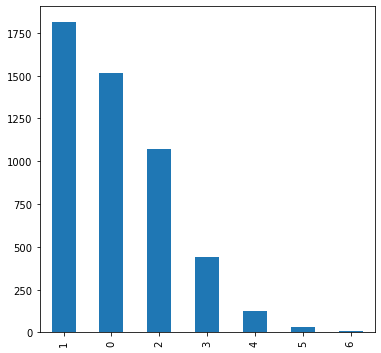

In [11]:
(data['Члены семьи']
            .value_counts()
            .plot.bar(figsize=(6, 6))
);

Члены семьи варьируются от 1 до 6. В основном это 0 или 1 член семьи.

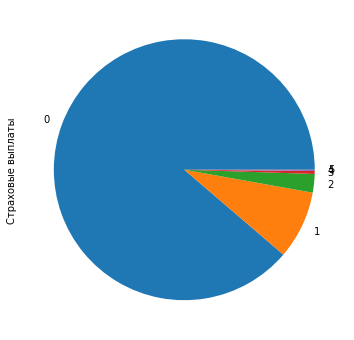

In [12]:
(data['Страховые выплаты']
            .value_counts()
            .plot.pie(figsize=(6, 6))
);

Видим, что подавляющее число семей не пользовалась страховыми выплатами. Что "на руку" страховым компаниям.

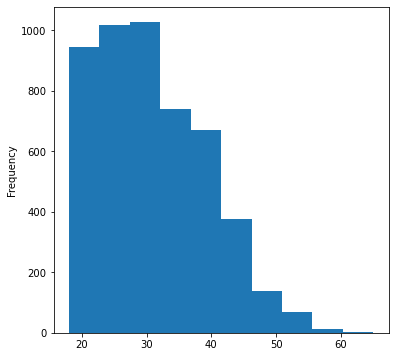

In [13]:
(data['Возраст']
            .plot.hist(figsize=(6, 6))
);

Подавляющее большинство - клиенты до 40 лет.

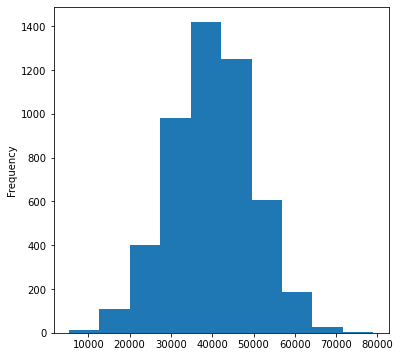

In [14]:
(data['Зарплата']
            .plot.hist(figsize=(6, 6))
);

График похож на нормальное распределение со средним и стандартным отклонением:

In [15]:
data['Зарплата'].describe()[1:3]

mean    39916.360000
std      9900.083569
Name: Зарплата, dtype: float64

## Умножение матриц

### Изменится ли качество линейной регрессии?

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

Качество линейной регрессии определяется метрикой MAE, минимальное значение которой достигается при значении вектора весов (вектора параметров): 

$$w = \arg\min_w MSE(Xw, y) = (X^T X)^{-1} X^T y$$

При этом вектор предсказаний определяется как:

$$
a = Xw
$$

Подсчитаем вектор предсказаний для двух случаев: 
1. Матрица признаков равна $ X $.
2. Матрица признаков равна $ XX^{-1}$.

**Случай 1. Матрица признаков равна $ X $**

Используя свойства обратимых матриц $ (AB)^{-1} = B^{-1}A^{-1}, AA^{-1} = E$, транспонированных матриц $ (AB)^{T} = B^{T}A^{T}, E^T = E$ и единичных матриц $EE = E, AE = EA = A$, а также свойство ассоциативности $ (AB)C = A(BC)$, получим:

Вектор параметров:

$$
w = (X^T X)^{-1} X^Ty = X^{-1}X^{-T}X^Ty = X^{-1}(X^{-T}X^T)y = X^{-1}Ey =  X^{-1}y.
$$

Вектор предсказаний для случая предсказания по обучаемым признакам:

$$a = X(X^{-1}y) = (XX^{-1})y = Ey = y.$$

Все верно: вектор предсказаний совпал с обучающим таргетом, покольку прогнозировали по обучающим признакам.

Вектор предсказаний для ОБЩЕГО СЛУЧАЯ (принимаем матрицу тестовых признаков равной $Z$):

$$a = ZX^{-1}y.$$

**Случай 2. Матрица признаков умножается на обратимую матрицу $A$**

В данном случае, чтобы осуществить умножение матрицы признаков на обратимую матрицу $A$, последняя должна быть квадратной размерностью $nxn$, где $n$ - количество признаков, а также пройти проверку на обратимость (определитель матрицы д.б. отличен от нуля). Исходная матрица признаков будет задана в виде произведения:

$$XA$$

Тогда вектор параметров с учетом выведенного выше выражения будет иметь вид:

$$
w = (XA)^{-1}y = A^{-1}X^{-1}y.
$$

Вектор предсказаний для случая предсказания по обучаемым признакам:

$$a = Xw = XAA^{-1}X^{-1}y = X(AA^{-1})X^{-1}y = XEX^{-1}y = (XX^{-1})y = Ey = y.$$

Вектор предсказаний для ОБЩЕГО СЛУЧАЯ (принимаем матрицу тестовых признаков равной $ZA$):

$$a = ZAA^{-1}X^{-1}y = Z(AA^{-1})X^{-1}y = ZEX^{-1}y = ZX^{-1}y.$$

Таким образом, качество линейной регрессии не изменится, поскольку вектор предсказаний после умножения матрицы признаков на обратную матрицу не изменился, как в случае предсказания по обучающим признакам, так и в случае предсказания по тестовым признакам.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$

Здесь теперь можем раскрыть скобки, так как матрицы $P^T, X^T X и P$ квадратные:

$$
w' = P^{-1}(X^T X)^{-1}P^{-T}P^TX^Ty
$$

$$
w' = P^{-1}(X^T X)^{-1}(P^{-T}P^T)X^Ty
$$

$$
w' = P^{-1}(X^T X)^{-1}EX^Ty
$$

$$
w' = P^{-1}((X^T X)^{-1}X^Ty)
$$

$$
w' = P^{-1}w
$$

что и требовалось доказать.

### Связь параметров линейной регрессии в исходной задаче и в преобразованной

Если обозначим вектор параметров для первого случая как $w_1$, а для второго случая - $w_2$, то получим следующую взаимосвязь:

$$ w_2 = A^{-1}w_1 $$

### Промежуточные выводы

- обоснована неизменность качества линейной регрессии при домножении матрицы признаков на обратимую матрицу;
- установлена взаимосвязь векторов параметров до и после преобразования: вектор параметров после домножения равен произведению матрицы обратной обратимой матрице на вектор параметров до преобразования.

## Алгоритм преобразования

1. Генерируем случайную матрицу размерностью $nxn$, где $n$ - количество обучающих признаков:$$A = (nxn).$$
2. Производим проверку сгенерированной матрицы на обратимость (определитель матрицы не равен нулю): $$det(A) != 0.$$
3. Умножаем исходную матрицу признаков размером $mxn$ на сгенерированную случайную матрицу размером $nxn$: $$X @ A,$$где $$X = features.values.$$
4. Используем полученную матрицу в качестве матрицы признаков в ходе предсказания с помощью линейной регрессии:$$X = X @ A.$$
5. Обратный доступ к данным - домножаем на матрицу обратную обратимой матрице $А$:$$X @ A @ A^{-1} = X @ (A @ A^{-1}) = X @ E = X.$$

**Обоснование**

С учетом полученных на шаге 2 выводов при домножении исходной матрицы признаков на случайную обратимую матрицу качество предсказания не изменяется, что видно по выражениям для векторов предсказания. <br>Таким образом, для защиты базы данных клиентов от несанкционированного доступа доверенное лицо может осуществлять домножение данных на обратимую случайную матрицу, которая в данном случае будет являться ключом, который не должен знать никто из остальных сотрудников компании. <br>Сотрудники-аналитики, в свою очередь, получают видоизмененную матрицу признаков и работают с моделью линейной регрессии без потери качества прогноза.
Сотрудникам, которые имеют право доступа к ограниченной информации, может быть выдан ключ, по которому они могут восстановить исходные данные.

### Промежуточные выводы 

- возможность умножения матрицы признаков на случайную обратимую матрицу без потери качества прогноза позволяет реализовать алгоритм защиты ценных корпоративных данных от несанкционированного доступа посторонних лиц, в частности, специалистов, занимающихся исследованием данных с помощью модели линейной регрессии - как показали теоретические выводы на 2 шаге качество метрик не ухудшается;
- алгоритм состоит из 5 этапов и основан на известных свойствах матриц и их преобразований.

## Проверка алгоритма

### Реализация предложенного алгоритма

In [16]:
# 1. Генерируем случайную матрицу
A = np.random.rand(features.shape[1], features.shape[1])

# 2. Проводим проверку на обратимость
if np.linalg.det(A) == 0:
    warn('Данная матрица необратима. Сформируйте другую матрицу.')

# 3. Умножаем исходную матрицу признаков на сгенерированную обратимую матрицу
feat = features.values @ A

# 4. Используем полученную матрицу в качестве матрицы признаков в ходе обучения модели линейной регрессии

# 5. Восстанавливаем исходные данные
features_recovered = feat @ np.linalg.inv(A)

In [17]:
# создаем класс LinearRegression1
class LinearRegression1:
    
    def fit(self, features, target):
        
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features):
        
        return features.dot(self.w) + self.w0

### Сравнение качества моделей

#### До преобразования

In [18]:
model = LinearRegression1() # создаем объект модели
model.fit(features, target) # обучаем модель
predictions = model.predict(features) # формируем предсказания по обучающей выборке
print(r2_score(target, predictions))

0.4249455028666801


Или то же самое с помощью функции sclearn LinearRegression:

In [19]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


#### После преобразования

In [20]:
model = LinearRegression1() # создаем объект созданного класса
model.fit(feat, target)
predictions = model.predict(feat)
print(r2_score(target, predictions))

0.4249455028660122


И то же самое с помощью штатной функции sclearn LinearRegression:

In [21]:
A = np.random.rand(features.shape[1], features.shape[1])
feat = features.values @ A
model = LinearRegression()
model.fit(feat, target)
predictions = model.predict(feat)
print(r2_score(target, predictions))

0.4249455028666802


### Промежуточные выводы

- предложенный на шаге 3 реализован программно, в частности с помощью функций библиотеки numpy;
- по аналогии с теоретическим материалом курса создан вручную класс модели линейной регрессии LinearRegression1;
- проведено сравнение результатов работы моделей, созданных на основе штатного класса sclearn - LinearRegression и на основе созданного класса LinearRegression1 для случая обычного использования матрицы признаков и случая домножения матрицы признаков на обратимую матрицу. В качестве критерия сравнения использована метрика r2. Во всех случаях значение метрики составило ~ 0.43, что подтвердило теоретические выводы, сделанные на 2 шаге.

## Общие выводы

**Целью выполнения проекта** являлась разработка метода преобразования информации для защиты данных клиентов страховой компании «Хоть потоп», при использовании которого качество моделей машинного обучения не должно было ухудшиться. 

**На первом этапе** загружены, изучены и преобработаны исходные данные по клиентам:
- исходный датасет состоит из 5000 элементов и 5 признаков; признаки: пол, возраст, зарплата, члены семьи; целевой признак: страховые выплаты;
- обнаружены и удалены 153 полных дубликата, поскольку они составляли около 3% от общего набора данных;
- пропуски не обнаружены;
- неинформативные признаки не обнаружены;
- данные разделены по целевому (4847,1) и нецелевому признакам (4847,4).

**На втором этапе** проведено теоретическое исследование с целью установить возможное влияние на качество модели линейной регрессии домножения матрицы признаков на обратимую матрицу:
- обоснована неизменность качества линейной регрессии при домножении матрицы признаков на обратимую матрицу;
- установлена взаимосвязь векторов параметров до и после преобразования: вектор параметров после домножения равен произведению матрицы обратной обратимой матрице на вектор параметров до преобразования.

**На третьем этапе** в соответствии с проведенными аналитическими расчетами предложен алгоритм преобразования данных:
- возможность умножения матрицы признаков на случайную обратимую матрицу без потери качества прогноза позволяет реализовать алгоритм защиты ценных корпоративных данных от несанкционированного доступа посторонних лиц, в частности, специалистов, занимающихся исследованием данных с помощью модели линейной регрессии - как показали теоретические выводы на 2 шаге качество метрик не ухудшается;
- алгоритм состоит из 5 этапов и основан на известных свойствах матриц и их преобразований.

**На четвертом этапе** осущетвлена программная реализация предложенного алгоритма преобразования данных и проведено сравнение результатов работы модели линейной регрессии для всех рассмотренных на 2 этапе случаев. В качестве критерия сравнения использована метрика r2. Во всех случаях значение метрики составило ~ 0.43, что подтвердило теоретические выводы, сделанные на 2 этапе.

Полученные в ходе выполнения проекта результаты показывают одно из возможных практических применений свойств матриц и их преобразований: обеспечить защиту ценной корпоративной информации путем элементарных матричных преобразований - домножения матрицы признаков на любую случайную обратимую матрицу.

## Вывод для начальства

**Целью выполнения проекта** являлась разработка метода преобразования информации для защиты данных клиентов компании, при использовании которого качество моделей машинного обучения не должно было ухудшиться.

Разработан специальный алгоритм преобразования данных. Для защиты базы данных клиентов от несанкционированного доступа предлагается выделить доверенное лицо, которое будет иметь специальный ключ для преобразования данных в соответствии с разработанным алгоритмом. 
Сотрудникам, которые имеют право доступа к ограниченной информации, может быть выдан ключ, по которому они могут восстановить исходные данные. Остальные сотрудники, в частности, сотрудники-аналитики, получают видоизмененные данные, при этом качество моделей машинного обучения не изменится.